# Procesamiento de Lenguaje Natural - **Hello Libraries!**

En esta notebook vamos a familiarizarnos con algunas de las diferentes bibliotecas para NLP que podemos encontrar disponibles para Python.

En caso de que los ejemplos lo requieran, los ejecutaremos tomando como base el comienzo de "Harry Potter y la Piedra Filosofal"

In [ ]:
text = "Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense. \
        Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere."

text_list = ["Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.",
                    "They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.",
                    "Mr. Dursley was the director of a firm called Grunnings, which made drills."
                    "He was a big, beefy man with hardly any neck, although he did have a very large mustache."
                    "Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.",
                    "The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere."]

## NLTK

*   Natural Language Toolkit (NLTK) es una biblioteca open source.
*   La herramienta estándar para investigación/desarrollo y educación.
*   Provee a los usuarios con herramientas básicas para operaciones relacionadas con texto. Buen punto de partida.

Permite realizar tareas como:
*   Clasificación.
*   Part-of-speech tagging.
*   Detección de entidades.
*   Tokenización.
*   Parsing.
*   Stemming.

Incluye recursos léxicos:
*    Penn Treebank corpus.
*    Open multilingual Wordnet.
*    Lin’s dependency thesaurus.
*    Subset de la colección de Gutenberg.
*    Diccionarios de pronunciación.

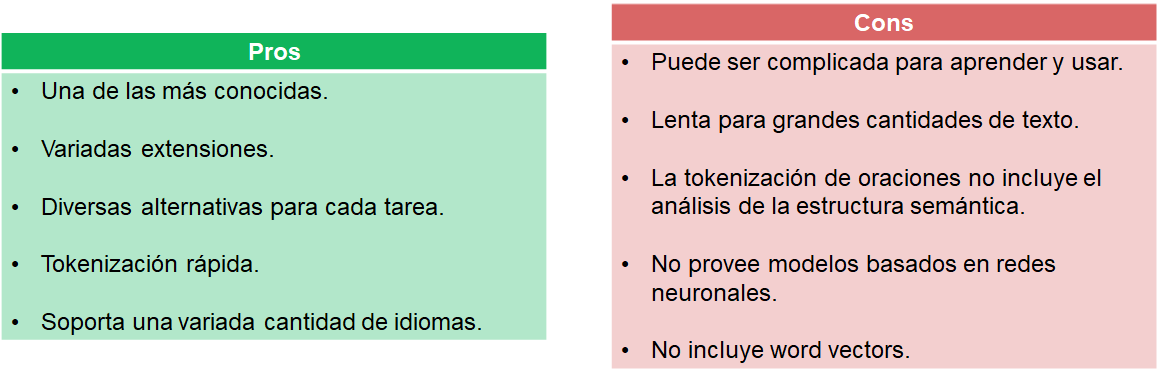

NLTK ya viene incluido en las distribuciones de Python. Sin embargo, en caso de ser necesario, puede ser instalada ejecutando:

In [ ]:
pip install nltk

In [ ]:
import nltk

### Algunos de los recursos léxicos disponibles

NLTK permite el acceso a diferentes recursos léxicos, entre ellos corpuses. Un *corpus lingüístico* es un conjunto estructurado de ejemplos reales de uso de la lengua, ya sea escrita o transcripciones de usos orales. Un corpus debe reflejar diferentes aspectos de la lengua en la que se hayan escritos, por ejemplo, tendencias respeto al uso de formas verbales. 

A continuación, veremos algunos de los que se encuentran disponibles.

#### Gutenberg Corpus

El [Proyecto Gutenberg](http://www.gutenberg.org/) es una colección de 60.000 libros elecrónicos disponibles gratuitamente que acumulan más de 443 millones de palabras. Incluye libros para los cuales los derechos de copyright se encuentran vencidos.

In [ ]:
nltk.download('gutenberg') # descargamos el corpus

In [ ]:
ids = nltk.corpus.gutenberg.fileids()
print(len(ids),ids)

In [ ]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt') # se pueden pedir las oraciones también, requiere descargar recursos adicionales
len(alice)

print(alice)

#### Texto de páginas Web y chats

A diferencia del corpus anterior que contiene libros representando la literatura de cierta formal más "tradicional", este corpus considera aspectos más informales y desestructurado del lenguage. Este corpus incluye:

*   Contendio de un foro de discusión de Firefox.
*   Conversaciones escuchadas en Nueva York (bien al estilo de "La gente anda diciendo").
*   El guión de Piratas en el Caribe.
*   Publicidades.
*   Comentarios sobre vinos.


In [ ]:
nltk.download('webtext') 

In [ ]:
from nltk.corpus import webtext

for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...') # por cada id, imprimimos los primeros 65 caracteres

Siguiendo con los textos desestructurados, también se incluye un corpus de sesiones de chat, originalmente recolectadas por la Naval Postgraduate School para la identificación automática de "predadores" virtuales (por ejemplo, relacionados al grooming). El corpus incluye más de 10.000 posts anonimizados y editados para remover toda la información identificatoria. 

El corpus se encuentra dividido en archivos de acuerdo a la sala de chat donde fue recolectado. El nombre del archivo codifica la fecha, sala de chat y cantidad de posts incluidos.



In [ ]:
nltk.download('nps_chat') 

In [ ]:
from nltk.corpus import nps_chat

print(nps_chat.fileids())

chatroom = nps_chat.posts('10-19-20s_706posts.xml')

print(chatroom[189])

#### Brown Corpus

Este corpus fue el primer corpus en idioma inglés incluyendo más de un millón de palabras en Inglés. Fue creado en 1961 por la Brown University. Contiene textos de más de 500 fuentes, las cuales se encuentran categorizadas en [géneros](http://icame.uib.no/brown/bcm-los.html) como noticias, editoriales, religión, misterio ...

In [ ]:
nltk.download('brown') 

In [ ]:
from nltk.corpus import brown

print("File ids:",brown.fileids())

print("Categorías:",brown.categories())

print("Words in religion:",brown.words(categories='religion')) # se puede definir una lista de categorias

print("Words in fileid:",brown.words(fileids=['ca08']))

Este corpus resulta útil para el estudio de las diferencias lingüísticas (o de estilo) entre los distintos géneros. Por ejemplo, es posible comparar el uso de los diferentes verbos modales en los diferentes géneros. Esto es al estilo de lo que hace Google con el [Ngram Viewer](https://books.google.com/ngrams).

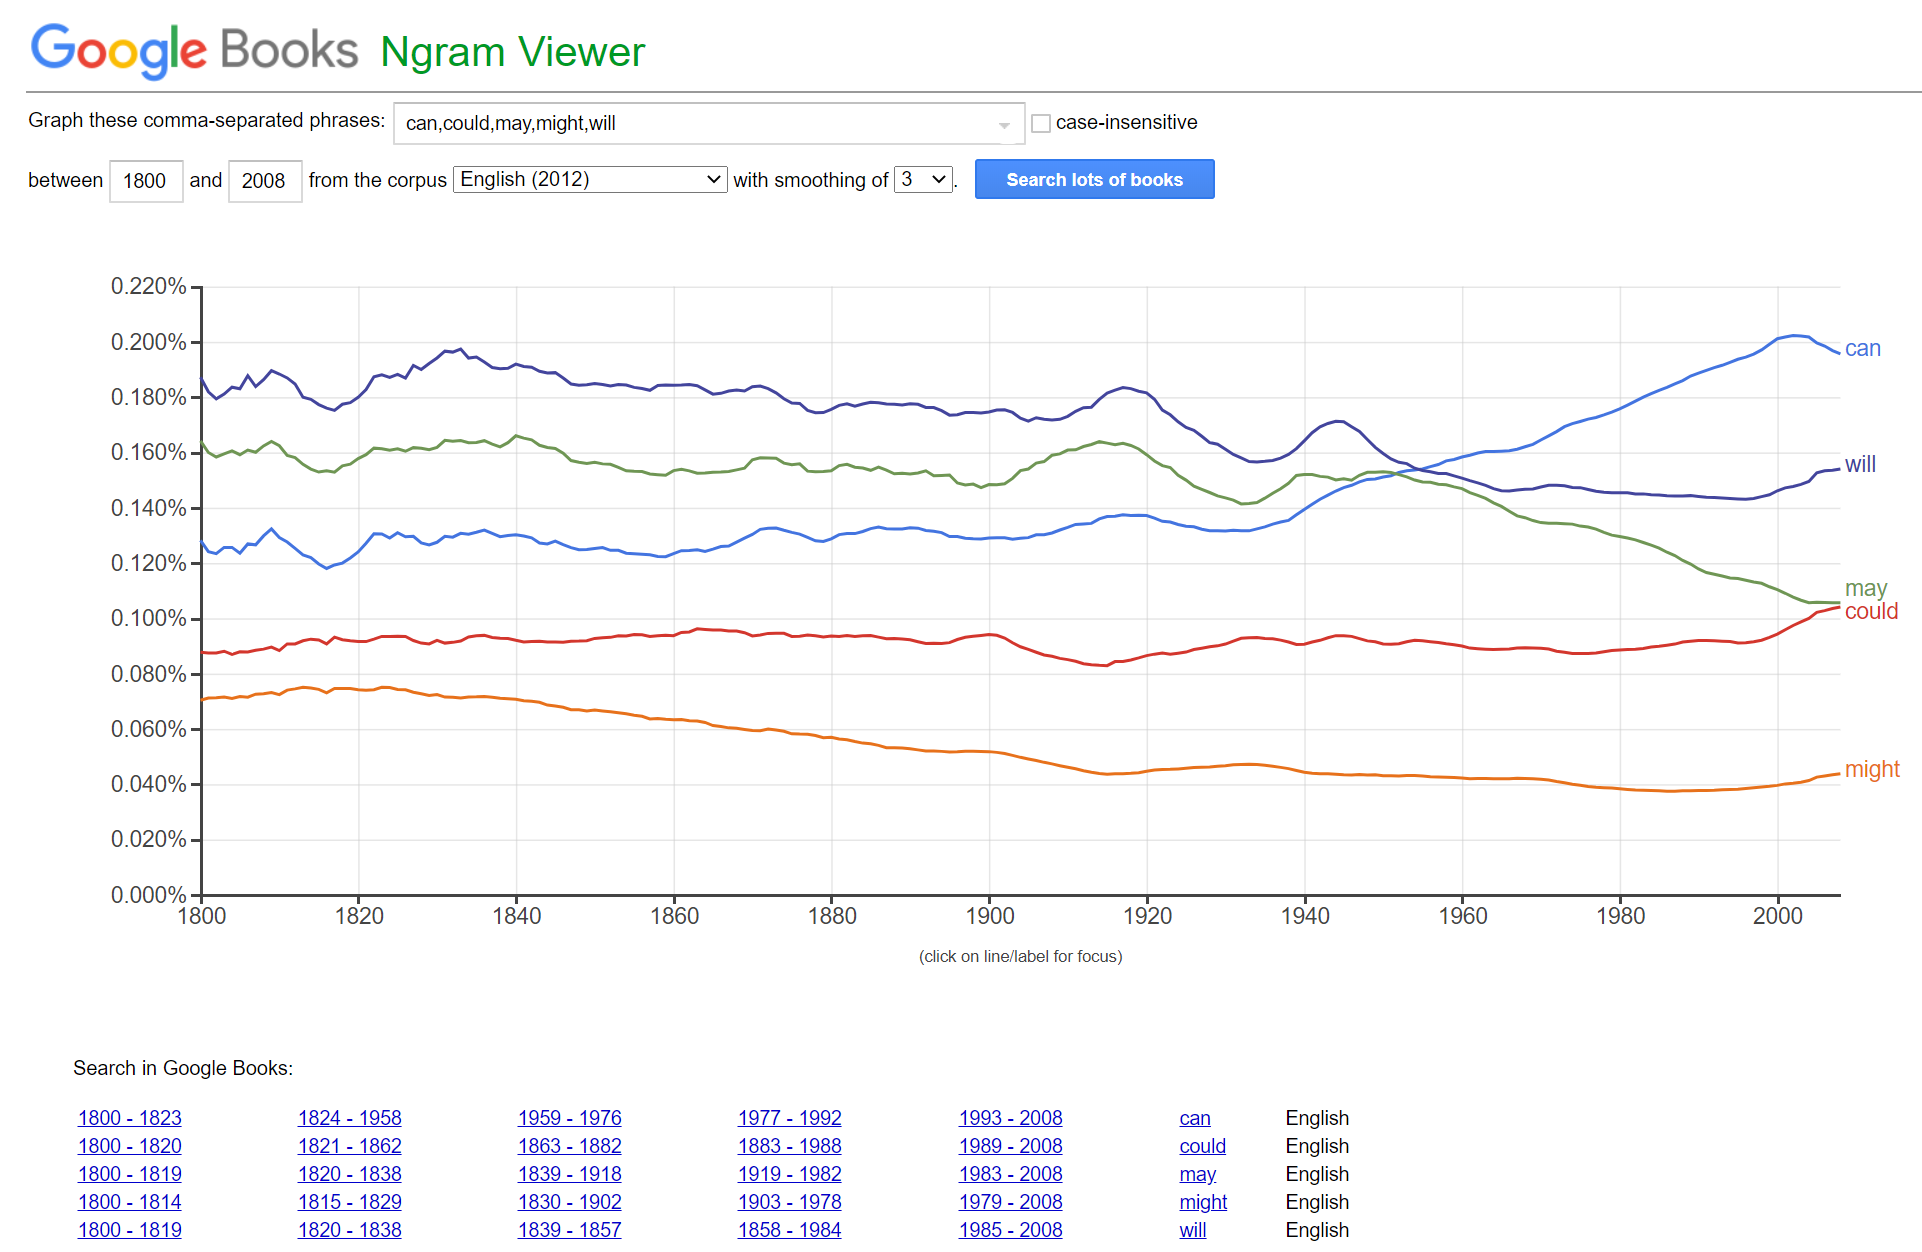

Por ejemplo, en el caso de las noticias:

In [ ]:
news_text = brown.words(categories='news')

fdist = nltk.FreqDist(w.lower() for w in news_text) # cálculo de frencuencias para cada palabra

modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':', fdist[m], end=' ')

Ahora, para poder comparar, tenemos que calcular las del resto. NLTK también soporta el cálculo de distribuciones de frecuencias condicionales.

Recordemos que las distribuciones de frecuencias condicionales registran la cantidad de veces que un fenómeno ocurrió, dada la condición bajo la cual el experimento fue ejecutado. Por ejemplo, la cantidad de veces que una palabra apareció, dada la longitud o categoría del texto analizado.


In [ ]:
cfd = nltk.ConditionalFreqDist( # también se pueden calcular las probabilidades ConditionalProbDist, requiere parámetros adicionales
          (genre, word)
          for genre in brown.categories()
          for word in brown.words(categories=genre))

genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']

print(cfd.tabulate(conditions=genres, samples=modals))

cfd.plot(conditions=genres, samples=modals)

#### WordNet

Wordnet es un diccionario orientado a la semántica, similar a los thesauros. No solo incluye las definiciones de los términos y relaciones de sinonimia/antonimia, sino que también incluye relaciones adicionales como la hiperonimia y la hiponomia. La versión en Inglés incluye más de 155.200 palabras y 117.600 pares de sinónimos. Es utilizado para la desambiguación y el cálculo de semejanza semántica, antes de la popularización de los embeedings.



In [ ]:
nltk.download('wordnet') 

In [ ]:
from nltk.corpus import wordnet
wordnet.synsets('car') # nos devuelve una lista de synsets, o conjuntos de sinónimos. La n indica que en todos los casos, los synset son sustantivos

In [ ]:
print(wordnet.synset('car.n.01').lemma_names()) # accedemos los lemmas asociados al synset
print(wordnet.synset('car.n.01').definition())
print(wordnet.synset('car.n.01').examples())

### Clasificación

NLTK también permite entrenar modelos de clasificación. En este ejemplo, vamos a entrenar un clasificador simple para identificar el tipo de documento del Brown Corpus que vimos anteriormente.

In [ ]:
import random
random.seed(42)

In [ ]:
documents = [(list(brown.words(fileid)), category) for category in brown.categories() for fileid in brown.fileids(category)]
random.shuffle(documents)

Luego, vamos a definir algunas características para entrenar el clasificador. En este caso vamos a usar una representación simple considerando las 2000 palabras más frecuentes en el corpus, indicando si los documentos contienen o no dichas palabras.


In [ ]:
all_words = nltk.FreqDist(w.lower() for w in brown.words()) # obtenemos todas las palabras del corpus
word_features = list(all_words)[:2000] # nos quedamos solo con las 2000 más frecuentes

In [ ]:
def document_features(document): # analizamos si el documento contiene o no las palabras seleccionadas, retornado aquellas que si
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

Una vez definidas las características a utilizar, podemos entrenar el clasificador. 
Para poder luego evaluar la performance del clasificador vamos a dividir el conjunto de artículos en training y test. No se proveen opciones para parametrizar.

In [ ]:
featuresets = [(document_features(d), c) for (d,c) in documents]

train_set, test_set = featuresets[100:], featuresets[:100] # los primeros y los últimos 100

classifier = nltk.NaiveBayesClassifier.train(train_set)
print(classifier.labels())

Una vez entrenado, podemos calcular la accuracy del classificador sobre el test set y determinar cuáles son las características más informativas.

``nltk.classify`` no provee métodos para el cálculo de precision y recall. Para calcularlos es necesario crear arreglos con los valores reales y predichos para cada instancia e invocar a ``nltk.metrics.scores``.

In [ ]:
print(nltk.classify.accuracy(classifier, test_set))

classifier.most_informative_features(10) # show_most_informative_features también incluye información respecto a la clase para la cual resultan relevantes

## spaCy

*   spaCy es la evolución más rápida y eficiente de NLTK. Fue diseñada específicamente para ser utilizada en produción para el procesamiento de grandes volúmenes de datos.
*   Soporta word vectors (como word2vec y doc2vec). (Ya los veremos más adelante)
*   Soporta tokenización para más de 30 idiomas.
*   Interfaz de pipeline extensible.

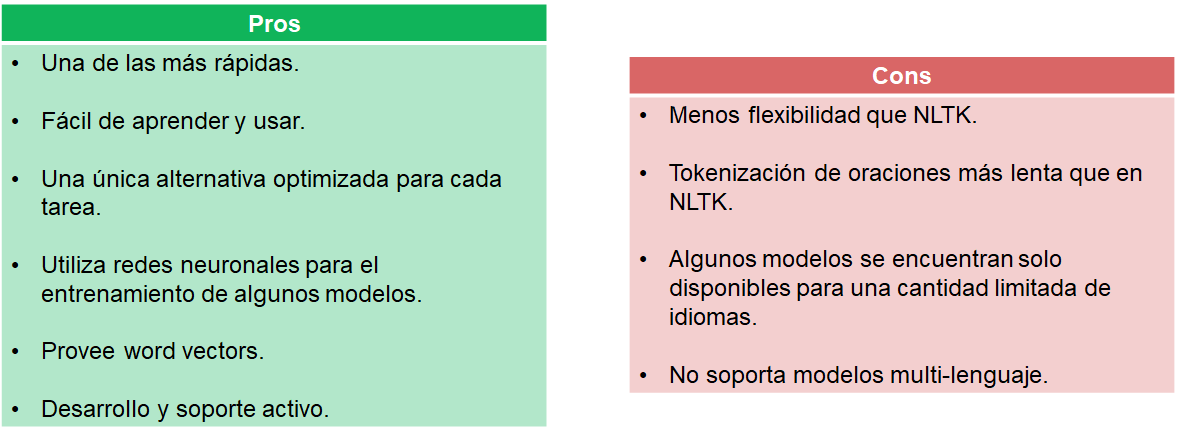

Debido a su orientación al uso de producción, no provee una amplia variedad de alternativas para las diferentes tareas, sino que provee una forma, tratando de combinar la facilidad de uso (la "experiencia del desarrollador") y la performance.

Es una biblioteca muy completa, pero no es la mejor desde un punto de vista de consistencia entre versiones. Los cambios de funcionalidad vienen acompañados de cambios a la interfaz de la API, por ejemplo, en cómo se llaman los modelos, como se crean los elementos, cuales son las partes constitutivas de los elementos, ... Hay que leer bien la documentación y tener cuidado al actualizar!!

Por ejemplo, si tienen la versión "equivocada" de spaCy, al querer cargar un modelo puede aparecer: ``[E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.``.

In [ ]:
pip install --upgrade spacy

In [ ]:
import spacy
spacy.cli.download("en_core_web_sm")

In [ ]:
nlp = spacy.load("en_core_web_sm") # este es el modelo más pequeño correspondiente al idioma Inglés. 
# "core_web" indica el corpus en el que está basado el modelo. Es posible cargar modelos en otros idiomas (es posible que haya que descargarlos).

doc = nlp(text) # para el fragmento de Harry Potter
for token in doc:
    print(token.text, token.pos_) 

Por defecto, spaCy define un pipeline de procesamiento que al menos incluye un tokenizer, un parser sintáctico, pos tagger y un detector de entidades. El pipeline es costumizable, no solo agregando módulos ya disponibles en spaCy sino módulos propios.

``Doc`` es la entidad resultado de aplicar el procesamiento al texto. No solo incluye la información de los tokens identificados, sino que también mantiene la información completa del texto original incluyendo los espacios en blanco. Esto permite la reconstrucción del texto original, evitando la pérdida de información.

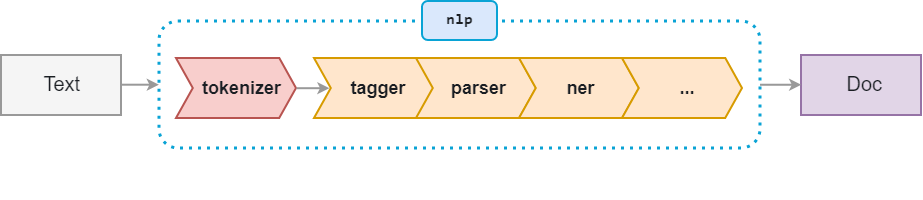

A continuación, la visualización del resultado de un parsing sintáctico que veremos más adelante.

In [ ]:
from spacy import displacy

displacy.render(doc, jupyter=True, options={'distance': 110,'arrow_stroke': 2,'arrow_width': 8})

## flair

*    Construida directamente sobre PyTorch.
*    Orientada a modelos de deep learning.
*    Provee modelos pre-entrenados para:
  *    Name Entity Recognition.
  *    Part-of-speech tagging.
  *    Clasificación.
*    Permite el entrenamiento de modelos.
*    Incluye word vectors populares, como GloVe, BERT, ELMo, … (ya los veremos más adelante).
*    Permite combinar diferentes tipos de word vectors.
*    Soporta múltiples lenguajes.
  *    Incluye modelos específicos por lenguajes.
  *    Incluye modelos multi-lenguajes, es decir, un mismo modelo que puede predecir etiquetas POS o NER para texto en diferentes modelos.
*    Desarrollo activo.

In [ ]:
pip install flair

No olvidar reiniciar el runtime luego de la instalación! (y volver a ejecutar la primera celda)

In [ ]:
from flair.models import SequenceTagger
from flair.data import Sentence

In [ ]:
tagger = SequenceTagger.load('upos') # define el modelo a utilizar, lo debe descargar

Con esta biblioteca también nos podemos encontrar con problemas de compatibilidad de ``Torch``. Algunos de los taggers no funcionan con todas las versiones de Torch. Si eso pasa, hay que reinstalar la versión adecuada de Torch.

In [ ]:
sentence = Sentence(text)

# predict NER tags
tagger.predict(sentence)

# print sentence with predicted tags
print(sentence.to_tagged_string())

for entity in sentence.get_spans('ner-large'):
    print(entity)

In [ ]:
tagger = SequenceTagger.load('pos-multi') # acá seleccionamos un modelo multi-lenguaje

In [ ]:
sentence = Sentence(text)

tagger.predict(sentence)

print(sentence.to_tagged_string())

También incluye modelos pre-entrenados de análisis de sentimientos basado en IMDB. También incluye un modelo entrenado con lenguaje ofensivo o discurso de odio, pero por ahora solo soporta alemán.

In [ ]:
from flair.models import TextClassifier

classifier = TextClassifier.load('en-sentiment')

In [ ]:
sentence = Sentence('I hated the film, but loved the music.')
classifier.predict(sentence)
print(sentence.labels)

sentence = Sentence('I loved the music.')
classifier.predict(sentence)
print(sentence.labels)

sentence = Sentence('I loved how bad it was.')
classifier.predict(sentence)
print(sentence.labels)

## Gensim

Gensim es una biblioteca open source diseñada para la exploración de documentos y topic modeling.

La característica más importante es la de word vectors. Considera el contenido de los documentos como secuencias de vectores y clusters; para luego clasificarlos.

Eficiente para procesar gran cantidad de datos.

Principales casos de uso:
Análisis de datos.
Aplicaciones de búsquedas semánticas. 
Aplicaciones de generación de textos (chatbot, personalización de servicios, resumen de textos, …).


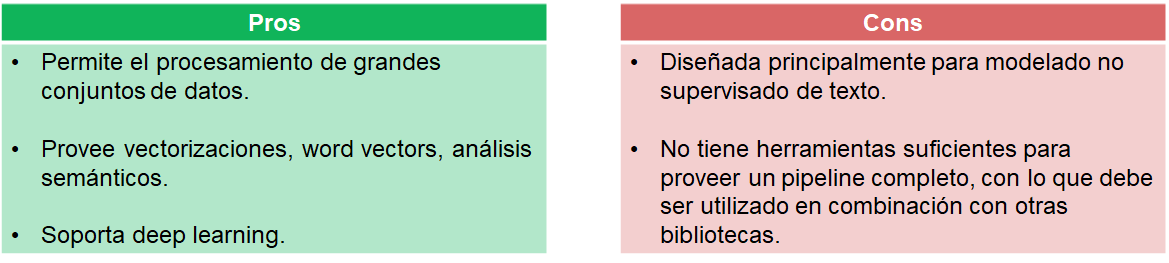


Requiere un poco más pre-procesamiento de los textos antes de poder utilizarla, aunque provee la funcionalidad para hacerlo. Lo primero que hay que hacer es transformar las palabras que aparecen en el texto en ids únicos. 

Este ``Dictionary`` creado contiene el mapping entre los términos, sus ids únicos y la frecuencia de aparición. Es actualizable, lo que significa que si le queremos agregar nuevos elementos no necesitamos procesar todo el texto, sino solo la parte a agregar. 




In [ ]:
import gensim
from gensim import corpora

In [ ]:
# El tokenizado depende de nosotros, en este caso estamos haciendo un tokenizado simple basado en los espacios.
texts = [[text for text in doc.split()] for doc in text_list] # acá usamos la lista de oraciones

# usamos GenSimp ara crear el diccionario con los ids únicos.
dictionary = corpora.Dictionary(texts)

print(dictionary)
print(dictionary.token2id)

In [ ]:
text_list2 = ["Hope you have -- er -- a good holiday, said Hermione, looking uncertainly after Uncle Vernon, shocked that anyone could be so unpleasant.",
              "Oh, I will, said Harry, and they were surprised at the grin that was spreading over his face.",
               "They don't know we're not allowed to use magic at home. I'm going to have a lot of fun with Dudley this summer...."
              ]

texts_2 = [[text for text in doc.split()] for doc in text_list2]

dictionary.add_documents(texts_2) # agregamos nuevos textos

print(dictionary)
print(dictionary.token2id)

Una vez construido el diccionario, podemos crear la segunda entidad necesaria para usar GenSim, el ``corpus``. Este ``corpus`` es una representación BOW del texto, es decir, una representación que contiene el id del término y la frecuencia en dicho texto.

Para este ejemplo, en lugar de hacer el split nosotros, vamos a usar el ``simple_preprocess`` de GenSim que incluye la tokenización, eliminación de acentos y se queda con los términos que tienen entre 2 y 15 caracteres.

In [ ]:
from gensim.utils import simple_preprocess

tokenized_list = [simple_preprocess(doc) for doc in text_list] 

dicti = corpora.Dictionary()
corpus = [dicti.doc2bow(doc, allow_update=True) for doc in tokenized_list]
print(corpus)

Luego, este ``corpus`` puede ser utilizado en otras transformaciones. Por ejemplo, TF-IDF:

In [ ]:
from gensim import models

model_tfidf = models.TfidfModel(corpus) # creando el modelo con el corpus

corpus_tfidf = model_tfidf[corpus] # aplicando el modelo al mismo corpus con el que lo creamos
for doc in corpus_tfidf:
    print(doc)

Del mismo modo en el que aplicamos el modelo TF-IDF también podemos aplicar modelos de transformaciones vectoriales como, por ejemplo, LDA (Latent Dirichlet Allocation). Esta tranformación busca disminuir la dimensionalidad mediante la transformación a un espacio con un tamaño determinado.

In [ ]:
model_lda = models.LdaModel(corpus, id2word=dicti, num_topics=4) # pueden probar que pasa si cambian la cantidad de tópicos a analizar

corpus_lda = model_lda[corpus] # aplicando el modelo al mismo corpus con el que lo creamos

# print(model_lda.get_topics())

corpus_lda = model_lda.get_document_topics(corpus)

for doc in corpus_lda:
    print(doc)



Una vez que tenemos los tópicos, podemos visualizar los tópicos dominates por documento.

In [ ]:
import pandas as pd

def format_topics_sentences(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame()

    # topics por documentos
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # tópico dominante, contribución, keywords
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=model_lda, corpus=corpus, texts=text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords']
df_dominant_topic.head(10)

Nubes de palabras de keywords por tópico:

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = model_lda.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## TextBlob

*    Una de las más bibliotecas más rápicas.
*    Está basada en NLTK.
*    Puede ser extendida.
*    Una de sus funcionalides más destacadas es la traducción.
*    Algunas funcionalidades:
  *  Análisis de sentimientos.
  *  Detección de eventos.
  *  Análisis de intenciones.
  *  POS tagging.
  *  Classificación.
  *  Tokenización.
  *  Parsing.
  *  Inflección de palabras (pluralización y singularización).
  *  Corrector ortográfico. (de la misma forma que NLTK)
  *  Integración con Wordnet. (de la misma forma que NLTK)

No soporta directamente el español. Si bien permite la extensión y agregado de módulos en otros lenguajes, una alternativa es primero traducir al inglés y luego utilizar las funcionalidades para dicho idioma.

In [ ]:
pip install TextBlob

In [ ]:
import nltk

nltk.download('punkt') # depende de recursos de nltk, en este caso un tokenizador
nltk.download('averaged_perceptron_tagger') # y un tagger

In [ ]:
from textblob import TextBlob

blob = TextBlob(text)

print(blob.tags)          

print(blob.noun_phrases) 

for sentence in blob.sentences:
    print(sentence,":",sentence.sentiment.polarity)

Una vez procesado el texto, también es posible obtener las frecuencias de palabras o frases. Se puede definir si se quiere que sea case sensitive o no (por defecto, ``false``).

In [ ]:
# accediendo como en un diccionario
print(blob.word_counts['dursley'])
print(blob.word_counts['Dursley']) # en este caso, no es case sensitive

# usando los métodos
print(blob.words.count('Dursley',False))
print(blob.words.count('Dursley',True))
print(blob.words.count('dursley',True))

TextBlob incluye funcionalidad para transformar palabras en plurales y singulares. Puede fallar (y bastante).

In [ ]:
textp = ("How very wrong he was.")
text_blob_object = TextBlob(textp)
print(text_blob_object.words.pluralize())

Si queremos sacar los plurales...

In [ ]:
textp = ("Hows veries wrongs they wass.")
text_blob_object = TextBlob(textp)
print(text_blob_object.words.singularize())

## Stanford-NLP - Stanza

*    Herramienta multi-propósito.
*    La ventaja más importante es la escalabilidad.
*    Es una de las opciones más adecuadas para el procesamiento de grandes volúmenes de datos y la realización de operaciones complejas.
*    Implementa modelos basados en deep learning, los cuales vienen pre-entrenados.

*    Una buena opción para:
  *    Scraping de datos de fuentes públicas (por ejemplo, algunos sitios de social media).
  *    Sentiment analysis.
  *    Interfaces conversacionales.
  *    Procesamiento y generación de texto (soporte al cliente, e-commerce).
  *    Provee modelos para diferentes lenguajes.

Todavía es posible utilizar la versión conocida como ``stanfordnlp``, pero las actualizaciones serán realizadas continuando el proyecto ``stanza``.

Para procesar un texto es necesario definir un pipeline que incluya las distintas unidades de procesamiento. Dado que el pipeline es dependiente del idioma, al definirlo es necesario definir el idioma, además de descargar los modelos necesarios. Por default, el pipeline va a incluir:
*    Tokenization.
*    Expansión de tokens multi palabra.
*    POS tagging.
*    Lemmatization.
*    Parsing de dependencias.
*    Reconocimiento de entidades (para los lenguajes soportados).

Esto puede ser costumizado con argumentos.

Stanza es "CUDA-aware", lo que significa que si encuentra un ambiente GPU lo usará, sino, utilizará CPU.

El pipeline retorna un objeto ``Document``, el cual contiene una lista de ``Sentences``, y cada una de ellas contiene una lista de ``Tokens`` y ``Words``. En la mayoría de los casos, los tokens y las palabras coinciden, pero algunos de los tokens puede ser divididos en múltiples palabras. Por ejemplo, las contracciones.

In [ ]:
pip install stanza

In [ ]:
import stanza
stanza.download('en') # hay que descargar los modelos para el lenguaje que querramos analizar. Son aproximadamente 400 mbs

In [ ]:
nlp = stanza.Pipeline('en') # se setea el pipeline por defecto para el idioma inglés. Por defecto: tokenize, pos tagger, lemmatization, ner y parsing sintáctico

doc = nlp(text) # doc contiene todas las anotaciones

for i, sent in enumerate(doc.sentences): # para todas las oraciones detectadas
    print("[Sentence {}]".format(i+1))
    for word in sent.words: # para todas las palabras de la oración
        print("{:12s}\t{:12s}\t{:6s}\t{:d}\t{:12s}".format(\
              word.text, word.lemma, word.pos, word.head, word.deprel))
    print("")

Mientras que Stanza implementa modelos basados en deep learning para las funcionalidades básicas de POS tagging y parsing de dependencias, la biblioteca base implementada en Java ofrece funcionalidades complementarias como la extracción de relaciones y la resolución de correferencias. Stanza provee una interfaz a la biblioteca de Java.

In [ ]:
# Descargamos la biblioteca base y la descomprimimos
!echo "Downloading CoreNLP..."
!wget "http://nlp.stanford.edu/software/stanford-corenlp-4.0.0.zip" -O corenlp.zip
!unzip corenlp.zip
!mv ./stanford-corenlp-4.0.0 ./corenlp

# seteamos variables de entorno
import os
os.environ["CORENLP_HOME"] = "./corenlp"

El ``CoreNLPClient`` incluido en Stanza funciona como una interface que inicia un proceso Java en background y luego inicializa un cliente en Python que actua de intermediario con el proceso de fondo y retorna el resultado.

In [ ]:
# Import client module
from stanza.server import CoreNLPClient

Ahora podemos crear la instancia del ``CoreNLPClient``. El constructor toma una lista de anotadores como argumento. Asimismo, también acepta un argumento para definir cuánta memoria será asignada al proceso java de fondo, y otro para definir el punto de conexión con el proceso Java. Por defecto, el puerto es el ``9000``, pero dado que ese puerto ya se encuentra utilizado por Colab, se seteará en ``9001``.

In [ ]:
# definición de anotadores, memoria a asignar y el puerto de conexión
client = CoreNLPClient(annotators=['tokenize','ssplit', 'pos', 'lemma', 'ner'], memory='4G', endpoint='http://localhost:9001')
print(client)

client.start() # opcional, por default, el servidor será iniciado cuando la priemra anotación es realizada

Si se imprimen los procesos ejecutando en background, se deberá encontrar el servidor Java.

In [ ]:
!ps -o pid,cmd | grep java

Para el procesamiento del texto, solo hay que pasar el texto a la función ``annotate``, la cual retornará un objeto ``Document`` con las anotaciones.

Nota. La primera anotación puede tardar.

In [ ]:
document = client.annotate(text)
print(document)

Para parar el servidor, hay que invocar el ``close``.

In [ ]:
client.stop()

In [ ]:
# volvemos a chequear si hay un proceso java ejecutando de fondo
!ps -o pid,cmd | grep java 

## Transformers

* No es exactamente una biblioteca de uso general, sino un “repositorio” de modelos pre-entrenados.

* Los modelos soportan tareas como:
    * Clasificación.
    * Information extraction.
    * Question answering.
    * Summarization.
    * Translation.
    * Text Generation.

* Cada una de las tareas está disponible en varios idiomas.

* Incluye tokenizers específicos para los diferentes modelos.

* Se pueden compartir y hostear modelos propios.

* Soporta diferentes backends: Pytorch, Jax y TensorFlow (hay excepciones)

Para un resumen de las tareas soportadas, ver la [documentación](https://huggingface.co/transformers/task_summary.html).

Lo primero es instalarla.

In [ ]:
pip install transformers

Para usar los modelos con un fragmento de texto, se puede utilizar la API de ``pipeline``. Los ``pipeline`` agrupan un modelo pre-entrenado junto con el pre-procesamiento que gue utlizado para dicho modelo.

Por ejemplo, para hacer clasificación de texto en sentimientos:

In [ ]:
from transformers import pipeline

La siguiente línea descarga y cachea el modelo pre-entrenado para esa tarea determinada. Luego, con ``classifier(...)`` se evalúa el modelo en un texto determinado.

In [ ]:
classifier = pipeline('sentiment-analysis')

In [ ]:
classifier('We are very happy to learn natural language processing!')

También se pueden utilizar modelos pre-entrenados para question-answering. En este caso, la respuesta incluye las posiciones entre las cuales se encuentra la respuesta y la confianza en la respuesta.

In [ ]:
question_answerer = pipeline('question-answering')

In [ ]:
question_answerer({
     'question': 'What is the name of the repository ?',
     'context': 'Pipeline has been included in the huggingface/transformers repository'
})

También se proveen otros modelos pre-entrenados, para los cuales se requiere:

* ``Tokenizer``. Responsable por todo el pre-procesamiento que el modelo espera. Puede ser invocado sobre un ``str`` o una lista de ``str``. Como output genera un diccionario que peude ser usar por separado o dentro de un pipeline.

* ``Model``. Un modelo de ``Pytorch`` o de ``TensorFlow``.

Ejemplo con ``Pytorch``:

In [ ]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

In [ ]:
inputs = tokenizer("Hello world!", return_tensors="pt")
outputs = model(**inputs)
outputs

Y acá la versión para ``TensorFlow``. 

Ojo, no todos los modelos se encuentran disponibles para ambos backends! Hay que leer la documentación.

In [ ]:
from transformers import AutoTokenizer, TFAutoModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = TFAutoModel.from_pretrained("bert-base-uncased")

In [ ]:
inputs = tokenizer("Hello world!", return_tensors="tf")
outputs = model(**inputs)
outputs

## IBM Watson

A diferencia de las otras bibliotecas NLPasS, es la única que no requiere de una tarjeta de crédito para la creación de la cuenta y uso.

Para poder usar esta biblioteca, se necesita tener una cuenta creada en la plataforma y a su vez crear una aplicación para el servicio que necesitamos para poder obtener las claves de autentificación.

Una vez que estamos logueados en ``IBM Cloud``, vamos a ``Create Resource`` --> buscamos ``Natural Language Understanding`` --> Lo seleccionamos.

Vamos a ver una pantalla similar a la siguiente (si no tienen nada creado no les va a saltar el aviso de que en la cuenta gratis solo pueden tener una instancia).

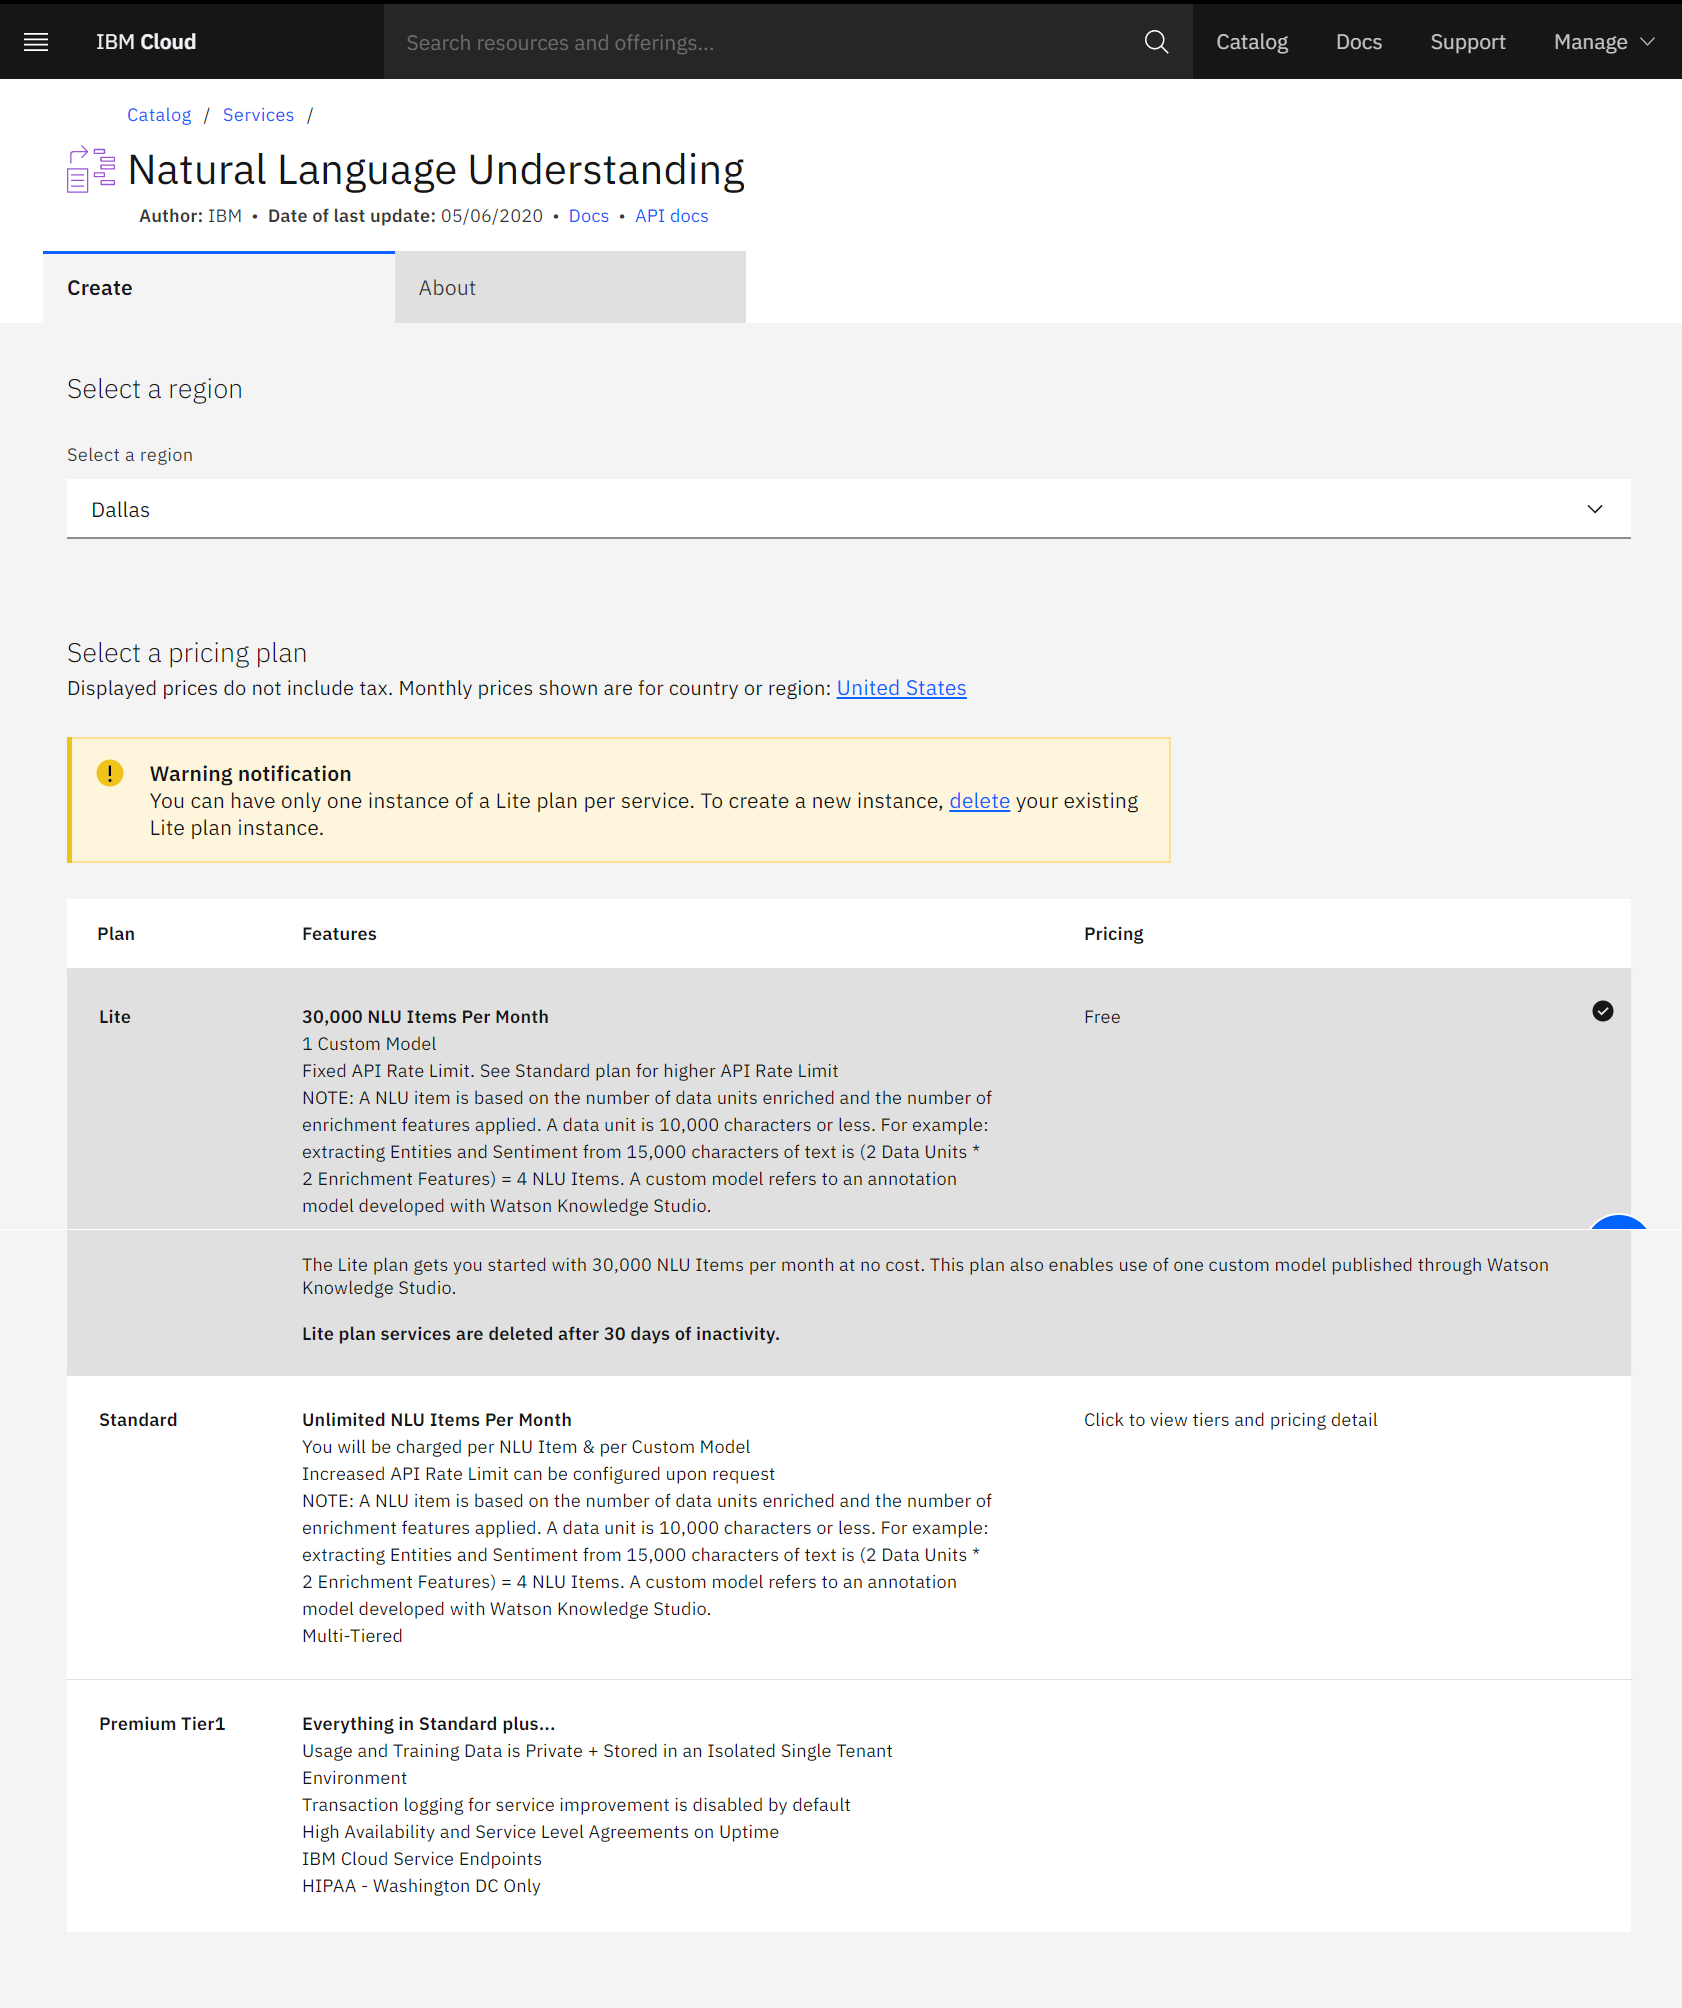

Seleccionan la región (es más o menos lo mismo cual elijan para estas pruebas que vamos a hacer) y aceptan la creación. Una vez creado el recurso en la sección de ``Manage`` van a poder gestionar las credenciales. Deberían ver algo parecido a la pantalla siguiente. Si no lo encuentran, usen el buscador para acceder de forma directa.

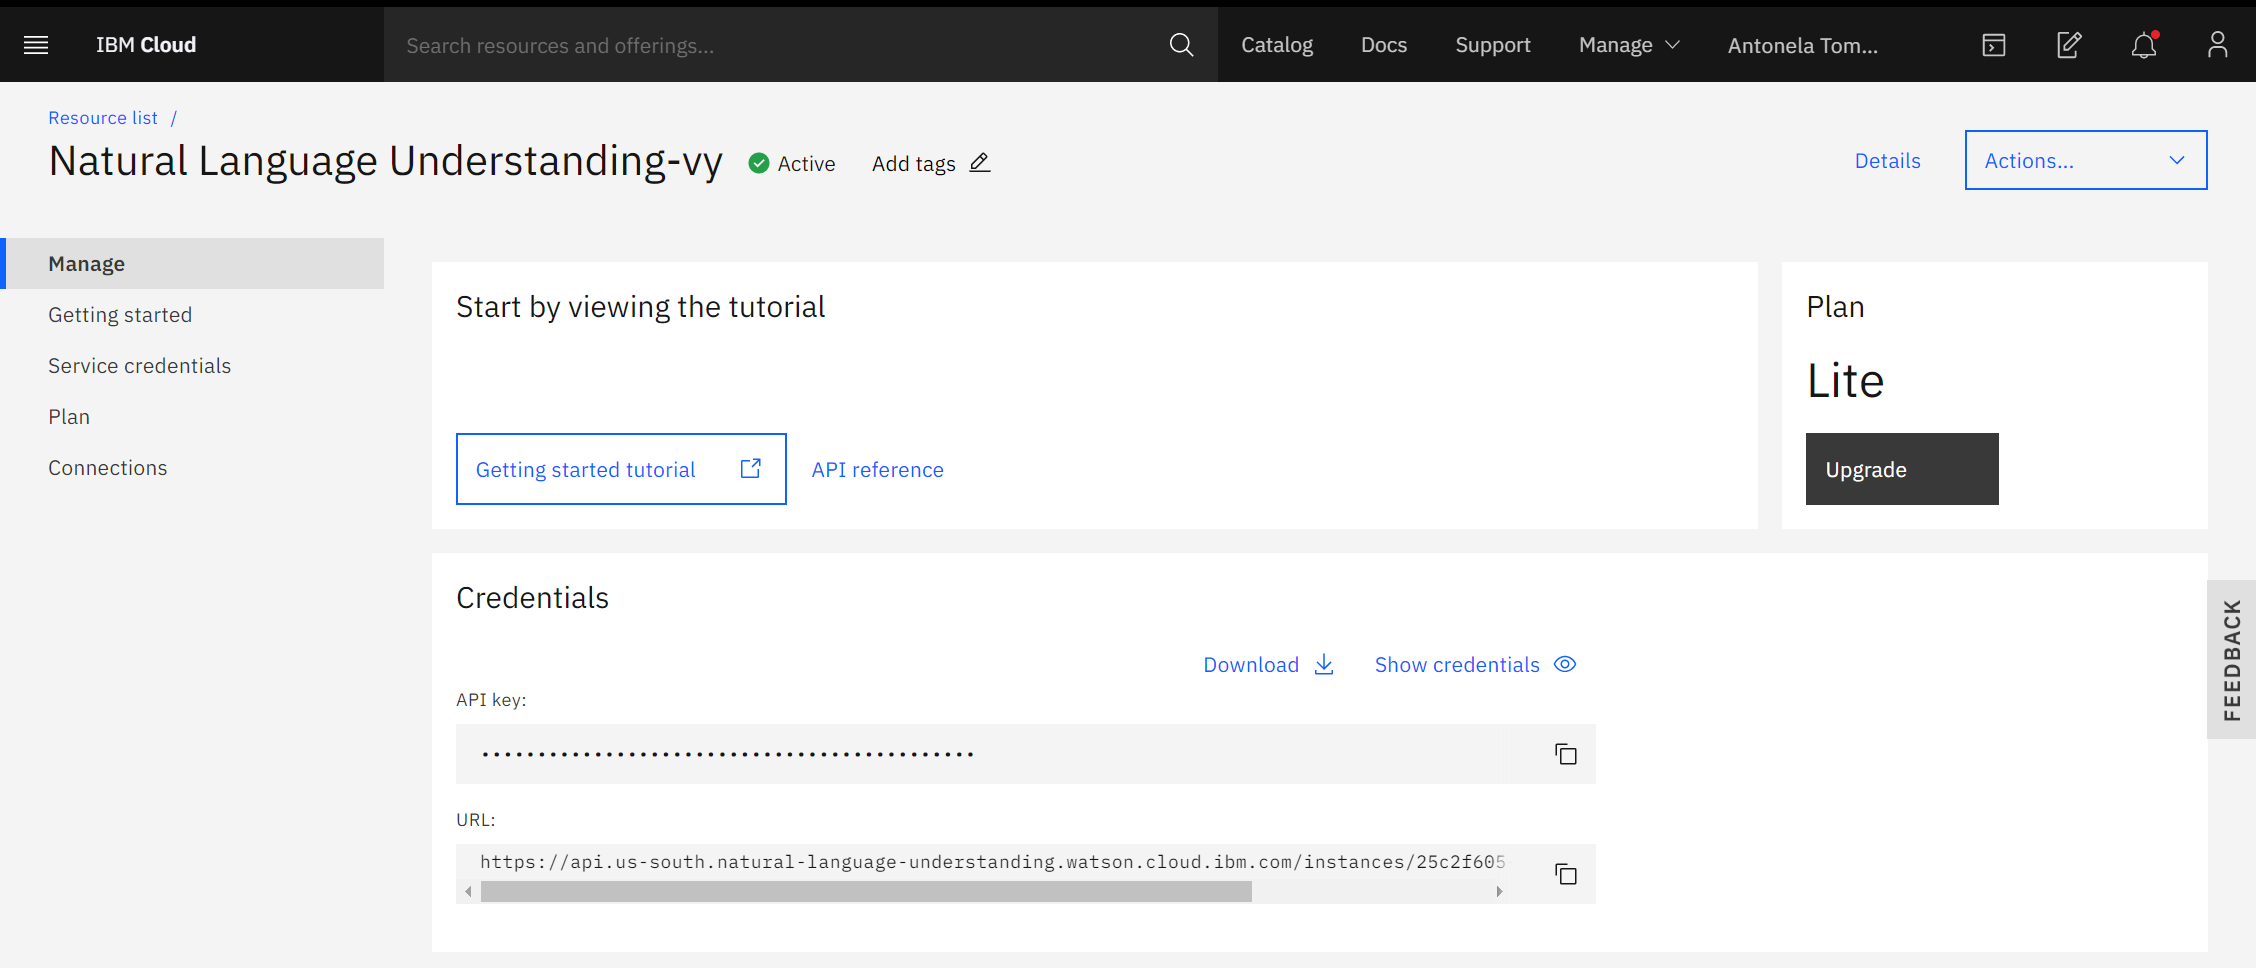

Ahora sí estamos listos para usar la API!

Nota: En el código no vamos a incluir nada de manejo de errores, pero podría ocurrir que en alguna invocación obtengamos algún error de red, recurso no disponible, queries agotadas, ...

In [ ]:
pip install --upgrade ibm-watson

In [ ]:
from ibm_watson.natural_language_understanding_v1 import Features, SemanticRolesOptions
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
import ibm_watson

authenticator = IAMAuthenticator('API_KEY')
nlu = ibm_watson.NaturalLanguageUnderstandingV1(version='2018-03-16', authenticator=authenticator)

nlu.analyze(text=text,
            features=Features(semantic_roles=SemanticRolesOptions())).get_result() # la respuesta va a ser un json que podemos procesar

Cambiando las opciones, es posible encontrar las entidades y palabras claves. Dado que la cantidad de consultas diarias que se pueden realizar son limitadas, lo mejor es definir todas las feaures juntas y procesar luego el ``.json`` completo.

In [ ]:
from ibm_watson.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions

nlu.analyze(text=text,features=Features(entities=EntitiesOptions(),keywords=KeywordsOptions())).get_result()

Este no es el único servicio que provee IBM. También hay otros de personalidad, valores, tono e intenciones. Todos se utilizan de forma similar.

**Nota**. Este está descontinuado y, por ahora, no han lanzado un reemplazo exacto. Si ya tenían una cuenta previa, se puede seguir utilizando hasta Diciembre de 2021.

In [ ]:
import json

authenticator = IAMAuthenticator('API_KEY')

service = ibm_watson.PersonalityInsightsV3(version='2017-10-13',authenticator=authenticator)

profile = service.profile(
        content=text,
        content_type='text/plain',
        content_language='en',
        accept='application/json'
        ).get_result()

print(json.dumps(profile, indent=2))